#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "Ali"
last_name= "Ghanbarian"
student_number= "401211328"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [153]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

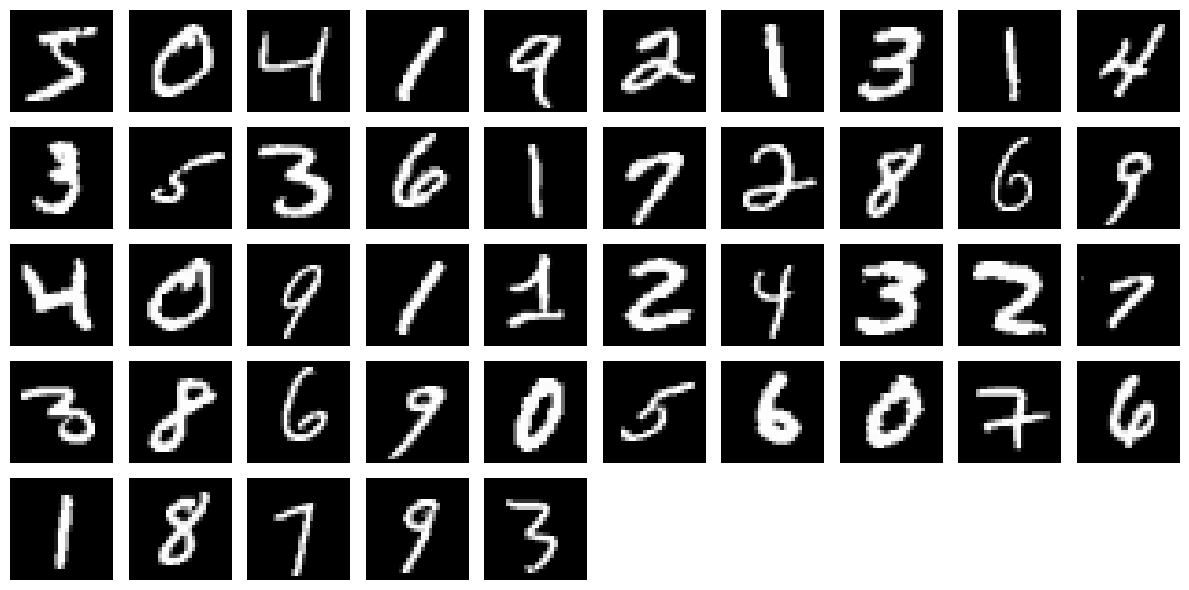

In [154]:
# here show 50 first of this images
def show_images(num_images,X):
    # TODO (implement show images function)
    number_of_rows = int(num_images/10) + 1
    # Create a subplot of rows and 10 columns to display images
    fig, axes = plt.subplots(number_of_rows, 10, figsize=(12, 6))
    # Iterate through the first 50 images and display them
    for i in range(number_of_rows):
        for j in range(10):
            image_index = i * 10 + j
            ax = axes[i, j]
            ax.axis('off')
            if(image_index < num_images):
                ax.imshow(X[image_index], cmap='gray')
                
    plt.tight_layout()
    plt.show()

show_images(45,x_train)

In [155]:
# reshape data
x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

# we fit PCA on the train_data, and then transform both train and test data with it.
# scale data to [0,1]
data = x_train.astype('float')/255





در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [156]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
# we fit PCA on the train_data, and then transform both train and test data with it.
# First, center the data
data = data - data.mean(axis=0)
cov_matrix = np.cov(data, rowvar=False)

# caclulate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sorting eigenvalues
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]



در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [157]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
total_variance = sum(eigenvalues)
# k will contain the number of principal components that explain the desired proportion of variance
k = 0   
variance_sum = 0

while variance_sum < explained_variance:
    variance_sum += eigenvalues[k] / total_variance
    k += 1
k

26

حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

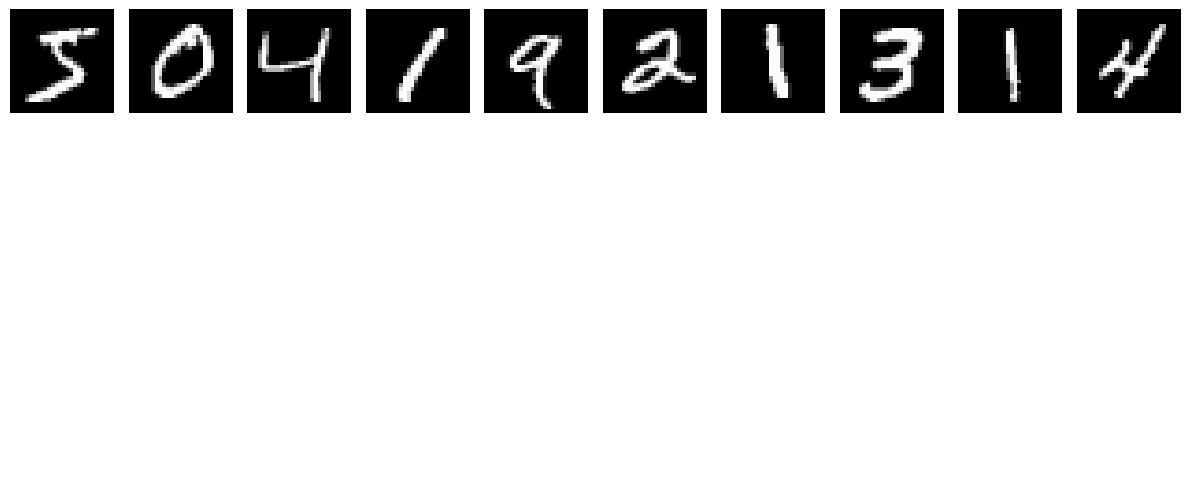

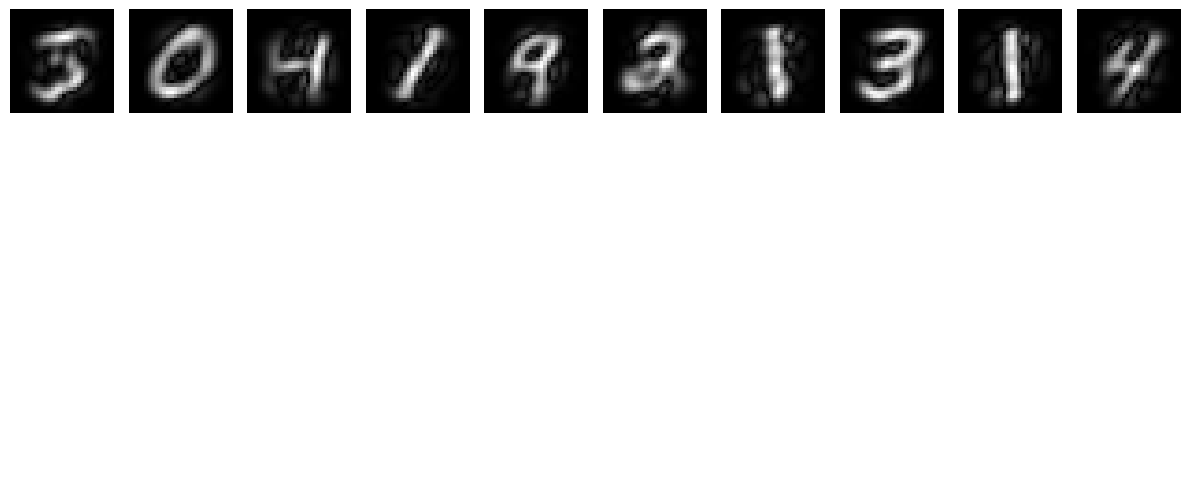

In [159]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image
top_k_eigenvectors = eigenvectors[:, :k]
x_train_reduced = np.dot(x_train, top_k_eigenvectors)
x_test_reduced = np.dot(x_test, top_k_eigenvectors)

#Reconstruction
x_train_reconstructed = np.dot(x_train_reduced, top_k_eigenvectors.T)
x_test_reconstructed = np.dot(x_train_reduced, top_k_eigenvectors.T)

#plot the dimentionally reduced data
show_images(10,x_train.reshape(-1,28,28))
show_images(10,abs(x_train_reconstructed.reshape(-1,28,28)))    # we use absolute value to avoid imaginary values
#plot the original data
# test = x_train.reshape(-1,28,28)


## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [197]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset

  #standardizing data
  mean = np.mean(data, axis=0)
  data = data.astype('float') / 255
  data = data-mean
  
  # caclulate eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # sorting eigenvalues
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]
  
  #output
  top_eigenvectors = eigenvectors[:, :n_components]
  projected_data = np.dot(data, top_eigenvectors)
  return projected_data


In [191]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.
# *** We have used KNN method.

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

    # Initialize and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=1)  # We can adjust the number of neighbors
    knn.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    if(print_output):
        print(f"KNN Accuracy: {acc * 100:.2f}%")

    return acc

In [209]:
X = np.append(x_train,x_test,axis=0)
X = X.reshape(-1,784)
y = np.append(y_train, y_test,axis=0)
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
acc_list, pc_list = [], []
for pc in range(2,101):
    print(f"n = {pc}")
    pc_list.append(pc)
    X_reduced = abs(do_pca(pc,X))
    acc = ML_model(X_reduced,y)
    acc_list.append(acc)


KNN Accuracy: 38.16%
KNN Accuracy: 43.77%
KNN Accuracy: 57.76%
KNN Accuracy: 68.92%
KNN Accuracy: 79.41%
KNN Accuracy: 84.34%
KNN Accuracy: 87.94%
KNN Accuracy: 90.09%
KNN Accuracy: 91.91%
KNN Accuracy: 92.89%
KNN Accuracy: 93.87%
KNN Accuracy: 94.88%
KNN Accuracy: 95.30%
KNN Accuracy: 95.57%
KNN Accuracy: 96.26%
KNN Accuracy: 96.33%
KNN Accuracy: 96.52%
KNN Accuracy: 96.66%
KNN Accuracy: 96.89%
KNN Accuracy: 97.07%
KNN Accuracy: 97.18%
KNN Accuracy: 97.27%
KNN Accuracy: 97.30%
KNN Accuracy: 97.26%
KNN Accuracy: 97.37%
KNN Accuracy: 97.41%
KNN Accuracy: 97.51%
KNN Accuracy: 97.58%
KNN Accuracy: 97.59%
KNN Accuracy: 97.61%
KNN Accuracy: 97.61%
KNN Accuracy: 97.61%
KNN Accuracy: 97.65%
KNN Accuracy: 97.68%
KNN Accuracy: 97.57%
KNN Accuracy: 97.64%
KNN Accuracy: 97.59%
KNN Accuracy: 97.59%
KNN Accuracy: 97.59%
KNN Accuracy: 97.64%
KNN Accuracy: 97.71%
KNN Accuracy: 97.69%
KNN Accuracy: 97.68%
KNN Accuracy: 97.66%
KNN Accuracy: 97.68%
KNN Accuracy: 97.73%
KNN Accuracy: 97.76%
KNN Accuracy:

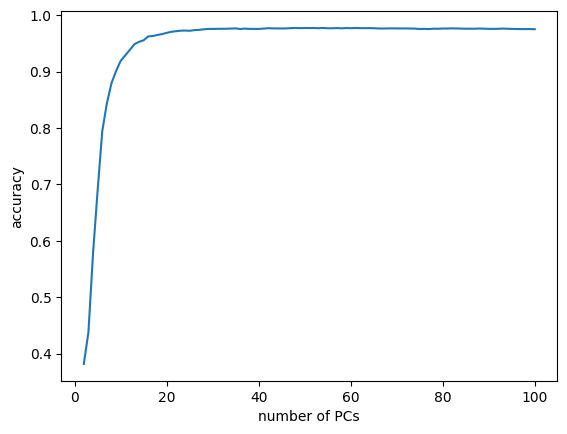

In [210]:
#plot the accuracy based on components.
plt.plot(pc_list, acc_list)
plt.xlabel("number of PCs")
plt.ylabel("accuracy")
plt.show()


In [211]:
#print the number of components that maximize the accuracy and the max accuracy
max_acc = np.max(acc_list).round(3)
final_pc = pc_list[np.argmax(acc_list)]
print(f"number of components that maximize the accuracy is {final_pc} and the max accuracy is {max_acc}")

number of components that maximize the accuracy is 54 and the max accuracy is 0.978
